In [18]:
!pip install fiona
!pip install pyproj
!pip install rtree
!pip install shapely
!pip install pyogrio
!pip install packaging
!pip install numpy
!pip install geopandas
!pip install matplotlib
!pip install mapclassify
!pip install folium

     |████████████████████████████████| 8.7 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 58.4 MB 14.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 23.5 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 3.6 MB/s eta 0:00:011


In [1]:
from src.enum.identifiers.Ride import Ride
from src.enum.identifiers.Net import Net
from src.enum.setup.Paths import Paths
from src.enum.setup.Dataset import Dataset
from src.enum.setup.FileFormat import FileFormat
from src.enum.setup.FileName import FileName
from src.enum.setup.City import City
from src.utils import utils
import geopandas as gpd
import json
import os

In [2]:
input_absolute_path_to_file = utils.generate_absolute_path_to_file(
    Paths.TAZ,
    FileName.TAZ_BOUNDARY,
    FileFormat.GEOJSON,
    Dataset.STANFORD,
    City.SAN_FRANCISCO
)
gdf = gpd.read_file(input_absolute_path_to_file)

In [3]:
gdf[Net.AREA.value] = gdf.area
gdf[Net.BOUNDARY.value] = gdf.boundary
gdf[Net.CENTROIDS.value] = gdf.centroid

/var/folders/lk/f9788htd3zz7ym_g3009qc0w0000gn/T/ipykernel_29575/1657571606.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf[Net.AREA.value] = gdf.area
/var/folders/lk/f9788htd3zz7ym_g3009qc0w0000gn/T/ipykernel_29575/1657571606.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf[Net.CENTROIDS.value] = gdf.centroid


In [4]:
gdf.head()

,ZIP,PO_NAME,STATE,Area__,Length__,geometry,area,boundary,centroids
0,94133,SAN FRANCISCO,CA,2.155245e+07,43114.362360,"MULTIPOLYGON (((-122.41920 37.80846, -122.4179...",0.000205,"MULTILINESTRING ((-122.41920 37.80846, -122.41...",POINT (-122.41125 37.80376)
1,94129,SAN FRANCISCO,CA,6.614746e+07,36589.100926,"MULTIPOLYGON (((-122.48586 37.79067, -122.4856...",0.000629,"MULTILINESTRING ((-122.48586 37.79067, -122.48...",POINT (-122.46638 37.79742)
2,94123,SAN FRANCISCO,CA,3.160277e+07,38751.405184,"MULTIPOLYGON (((-122.44644 37.79285, -122.4467...",0.000300,"MULTILINESTRING ((-122.44644 37.79285, -122.44...",POINT (-122.43638 37.80078)
3,94109,SAN FRANCISCO,CA,2.923981e+07,30323.948555,"MULTIPOLYGON (((-122.41195 37.78886, -122.4118...",0.000278,"MULTILINESTRING ((-122.41195 37.78886, -122.41...",POINT (-122.42120 37.79312)
4,94111,SAN FRANCISCO,CA,9.973098e+06,31453.782366,"MULTIPOLYGON (((-122.39915 37.79111, -122.3995...",0.000095,"MULTILINESTRING ((-122.39915 37.79111, -122.39...",POINT (-122.39948 37.79828)


In [5]:
gdf.shape

(25, 9)

In [6]:
gdf.explore(Net.AREA, legend=False)

<AxesSubplot:>

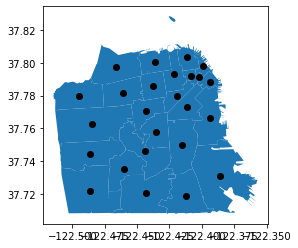

In [7]:
ax = gdf[Net.GEOMETRY.value].plot()
gdf[Net.CENTROIDS.value].plot(ax=ax, color="black")

In [8]:
rows_distances = []
for i in range(gdf.shape[0]):
    distances = []
    label = f"{gdf[Net.ZIP.value.upper()].iloc[i]}"
    centroid = gdf[Net.CENTROIDS.value].iloc[i]
    distances = gdf[Net.CENTROIDS.value].distance(centroid)
    for idx, distance in enumerate(distances):
        ref_zip_code = gdf[Net.ZIP.value.upper()].iloc[i]
        other_zip_code = gdf[Net.ZIP.value.upper()].iloc[idx]
        rows_distances.append((ref_zip_code, other_zip_code, distance))
    #gdf[label] = distances

gdf_distance = gpd.GeoDataFrame(rows_distances, columns=[Net.SOURCE.value, Net.DESTINATION.value, Net.DISTANCE.value])

/var/folders/lk/f9788htd3zz7ym_g3009qc0w0000gn/T/ipykernel_29575/630439139.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = gdf[Net.CENTROIDS.value].distance(centroid)


In [9]:
gdf.head(25)

,ZIP,PO_NAME,STATE,Area__,Length__,geometry,area,boundary,centroids
0,94133,SAN FRANCISCO,CA,2.155245e+07,43114.362360,"MULTIPOLYGON (((-122.41920 37.80846, -122.4179...",0.000205,"MULTILINESTRING ((-122.41920 37.80846, -122.41...",POINT (-122.41125 37.80376)
1,94129,SAN FRANCISCO,CA,6.614746e+07,36589.100926,"MULTIPOLYGON (((-122.48586 37.79067, -122.4856...",0.000629,"MULTILINESTRING ((-122.48586 37.79067, -122.48...",POINT (-122.46638 37.79742)
2,94123,SAN FRANCISCO,CA,3.160277e+07,38751.405184,"MULTIPOLYGON (((-122.44644 37.79285, -122.4467...",0.000300,"MULTILINESTRING ((-122.44644 37.79285, -122.44...",POINT (-122.43638 37.80078)
3,94109,SAN FRANCISCO,CA,2.923981e+07,30323.948555,"MULTIPOLYGON (((-122.41195 37.78886, -122.4118...",0.000278,"MULTILINESTRING ((-122.41195 37.78886, -122.41...",POINT (-122.42120 37.79312)
4,94111,SAN FRANCISCO,CA,9.973098e+06,31453.782366,"MULTIPOLYGON (((-122.39915 37.79111, -122.3995...",0.000095,"MULTILINESTRING ((-122.39915 37.79111, -122.39...",POINT (-122.39948 37.79828)
5,94108,SAN FRANCISCO,CA,7.705085e+06,14174.111829,"MULTIPOLYGON (((-122.40355 37.78757, -122.4060...",0.000073,"MULTILINESTRING ((-122.40355 37.78757, -122.40...",POINT (-122.40839 37.79179)
6,94115,SAN FRANCISCO,CA,3.056166e+07,24300.439024,"MULTIPOLYGON (((-122.42851 37.77907, -122.4299...",0.000290,"MULTILINESTRING ((-122.42851 37.77907, -122.42...",POINT (-122.43747 37.78589)
7,94105,SAN FRANCISCO,CA,1.238288e+07,26722.984980,"MULTIPOLYGON (((-122.40355 37.78757, -122.4034...",0.000118,"MULTILINESTRING ((-122.40355 37.78757, -122.40...",POINT (-122.39383 37.78852)
8,94104,SAN FRANCISCO,CA,1.960458e+06,7187.004374,"MULTIPOLYGON (((-122.40340 37.78768, -122.4038...",0.000019,"MULTILINESTRING ((-122.40340 37.78768, -122.40...",POINT (-122.40194 37.79144)
9,94118,SAN FRANCISCO,CA,4.612865e+07,31063.661554,"MULTIPOLYGON (((-122.45467 37.77479, -122.4562...",0.000438,"MULTILINESTRING ((-122.45467 37.77479, -122.45...",POINT (-122.46122 37.78186)


In [10]:
gdf[gdf[Net.ZIP.value.upper()]=="94133"]

,ZIP,PO_NAME,STATE,Area__,Length__,geometry,area,boundary,centroids
0,94133,SAN FRANCISCO,CA,2.155245e+07,43114.36236,"MULTIPOLYGON (((-122.41920 37.80846, -122.4179...",0.000205,"MULTILINESTRING ((-122.41920 37.80846, -122.41...",POINT (-122.41125 37.80376)


In [11]:
gdf_distance.head()


,src,dst,distance
0,94133,94133,0.000000
1,94133,94129,0.055490
2,94133,94123,0.025301
3,94133,94109,0.014566
4,94133,94111,0.012988


In [12]:
gdf_distance.shape

(625, 3)

In [13]:
gdf_distance[gdf_distance[Net.SOURCE.value]=="94133"]

,src,dst,distance
0,94133,94133,0.000000
1,94133,94129,0.055490
2,94133,94123,0.025301
3,94133,94109,0.014566
4,94133,94111,0.012988
5,94133,94108,0.012311
6,94133,94115,0.031723
7,94133,94105,0.023147
8,94133,94104,0.015445
9,94133,94118,0.054550


In [14]:
gdf_distance_ordered = gdf_distance.sort_values(by=[Net.SOURCE.value, Net.DISTANCE.value])

In [15]:
gdf_distance_ordered.head()

,src,dst,distance
286,94102,94102,0.000000
287,94102,94103,0.010423
278,94102,94109,0.013669
280,94102,94108,0.016515
281,94102,94115,0.019070


In [16]:
def label_distance(row):
    if row[Net.DISTANCE.value] <= 0.030:
        return Ride.SHORT.value
    if row[Net.DISTANCE.value] <= 0.060:
        return Ride.NORMAL.value
    if row[Net.DISTANCE.value] <= 0.09:
        return Ride.LONG.value
    if row[Net.DISTANCE.value] > 0.09:
        return Ride.EXTREME.value

In [17]:
gdf_distance_ordered[Net.LENGTH.value] = gdf_distance_ordered.apply(lambda x: label_distance(x), axis=1)

In [18]:
gdf_distance_ordered[gdf_distance_ordered[Net.SOURCE.value]=="94114"]

,src,dst,distance,length
390,94114,94114,0.000000,short
393,94114,94131,0.014348,short
388,94114,94117,0.014673,short
392,94114,94110,0.022045,short
386,94114,94102,0.026919,short
381,94114,94115,0.027873,short
387,94114,94103,0.028713,short
396,94114,94127,0.033160,normal
384,94114,94118,0.034882,normal
378,94114,94109,0.037926,normal


In [19]:
distance_dict = {}
for k, row in gdf_distance_ordered.iterrows():
    if not row[Net.SOURCE.value] in distance_dict:
        distance_dict[row[Net.SOURCE.value]] = {
            Ride.SHORT.value: [],
            Ride.NORMAL.value: [],
            Ride.LONG.value: [],
            Ride.EXTREME.value: []
        }
    distance_dict[row[Net.SOURCE.value]][row[Net.LENGTH.value]].append(str(row[Net.DESTINATION.value]))

In [20]:
output_absolute_path_to_file = utils.generate_absolute_path_to_file(
    Paths.CENTROIDS_TAZ,
    FileName.CENTROIDS,
    FileFormat.CSV,
    Dataset.STANFORD,
    City.SAN_FRANCISCO
)
utils.check_path_exists(output_absolute_path_to_file, is_path_file=True)
gdf_distance_ordered.to_csv(output_absolute_path_to_file, index=False)

In [21]:
output_absolute_path_to_file = utils.generate_absolute_path_to_file(
    Paths.CENTROIDS_TAZ,
    FileName.CENTROIDS,
    FileFormat.JSON,
    Dataset.STANFORD,
    City.SAN_FRANCISCO
)
utils.check_path_exists(output_absolute_path_to_file, is_path_file=True)
utils.export_file_from_absolute_path(output_absolute_path_to_file, FileFormat.JSON, distance_dict)